# Proyecto 03 - Series de Tiempo


### Creado por: Josefina Panettieri
#### josefinapanettieri86@gmail.com

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

### PARTE A: Preprocesamiento de datos aportado por Acamica.

In [44]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datetime as dt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# colores
c1 = '#121d27'
c2 = '#12404d'
c3 = '#146e7e'
c4 = '#1aa5bb'
c5 = '#20dad8'
c6 = '#002e00'
c7 = '#005d5d'
c8 = '#ff0e4d'
c9 = '#ffc630'
c10 = '#f4ffb5'
c11 = '#002e00'
c12 = '#005d5d'
c13 = '#ff0e4d'
c14 = '#ffc630'
c15 = '#f4ffb5'


In [45]:
#carga de dataset
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [46]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [47]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [48]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [49]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [50]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [51]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [52]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [53]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019,2019-01-01,2,Martes,Centro,Liviano,537
86,2019,2019-01-01,2,Martes,Centro,Pesado,1
88,2019,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019,2019-01-01,3,Martes,Centro,Liviano,769


In [54]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,periodo,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,2019,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [55]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,periodo,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,2019,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,2019,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,2019,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,2019,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,2019,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [56]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,periodo,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,2017,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,2017,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,2017,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,2017,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,2017,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...,...
238864,2019,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,2019,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,2019,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,2019,Martes,Centro,Liviano,214,2019-12-31 23:00:00


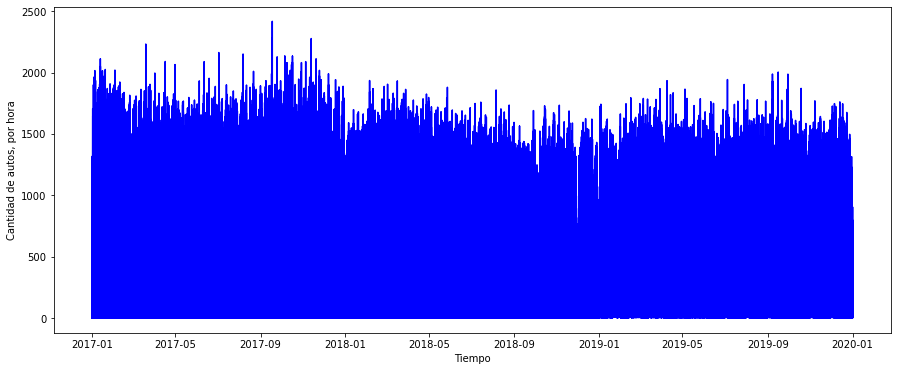

In [57]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos, color='b')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Al estar trabajando con frecuencias muy pequeñas, en una ventana de tiempo muy grande, es probable que el gráfico sea difícil de leer. Vamos a realizar un resampleo de los datos y agruparlos por día. De esta forma esperamos tener una mejor vizualización.

In [58]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario= dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario

(1095, 2)


,periodo,cantidad_pasos
fecha,,
2017-01-01,465927,31183
2017-01-02,637372,51568
2017-01-03,619219,51093
2017-01-04,647457,53332
2017-01-05,641406,56486
...,...,...
2019-12-27,193824,40182
2019-12-28,193824,30681
2019-12-29,193824,26259


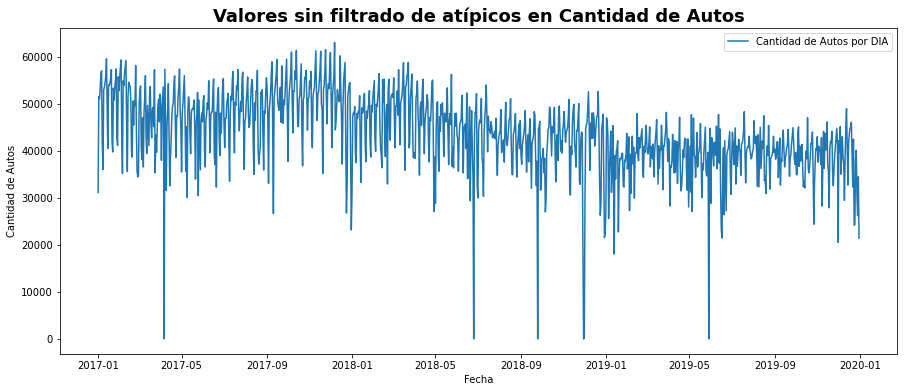

In [59]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de Autos por DIA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Autos')
plt.title ('Valores sin filtrado de atípicos en Cantidad de Autos', size=18,fontweight="bold")
plt.legend()
plt.show()


# Outliers


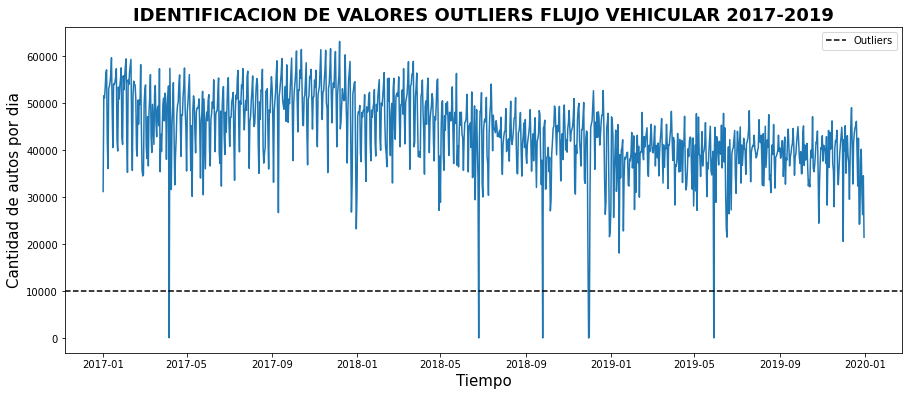

In [60]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Cantidad de autos por dia', fontsize=15)
plt.axhline(y=10000,color="k",linestyle="--",label="Outliers")
plt.title("IDENTIFICACION DE VALORES OUTLIERS FLUJO VEHICULAR 2017-2019",size=18,fontweight="bold")
plt.legend()
plt.show()

En el grafico anterior podemos observar que la linea negra nos muestra los valores outliers los cuales debemos tratar para poder continuar con nuestro proceso de analisis de serie temporal.

In [61]:
# filtramos valores menores a 10000 y se convierten en valores faltantes
diario.cantidad_pasos[diario.cantidad_pasos<10000]= np.nan


In [62]:
# con la funcion interpolate los valores faltantes asumen un valor consecuente dentro de la serie temporal
diario= diario.interpolate()

In [63]:
#verificamos que no nos queden valores faltantes
diario.isna().sum()

periodo           0
cantidad_pasos    0
dtype: int64

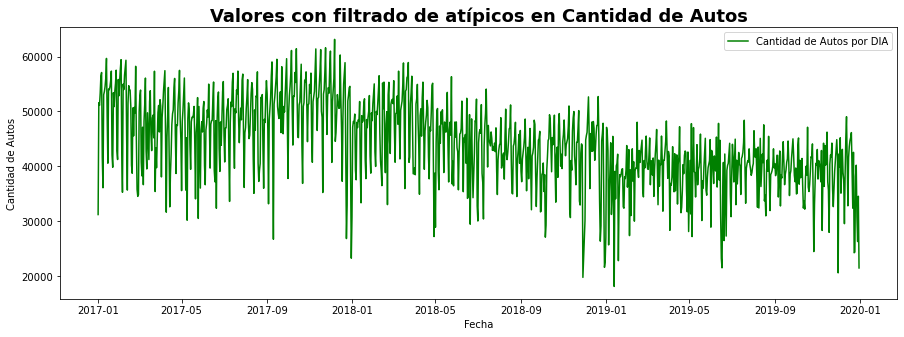

In [66]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de Autos por DIA', color='g')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Autos')
plt.title ('Valores con filtrado de atípicos en Cantidad de Autos',size=18,fontweight="bold" )
plt.legend()
plt.show()

### PARTE B: Exploración de datos. 
Vamos realizar un análisis de los datos para ver como son sus caracteristicas.

In [22]:
dataset.head()

,periodo,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,2017,Domingo,Provincia,Pesado,1,2017-01-01
1,2017,Domingo,Provincia,Liviano,9,2017-01-01
2,2017,Domingo,Provincia,Liviano,644,2017-01-01
3,2017,Domingo,Provincia,Pesado,6,2017-01-01
4,2017,Domingo,Provincia,Pesado,1,2017-01-01


### **Análisis del feature "Dia"**

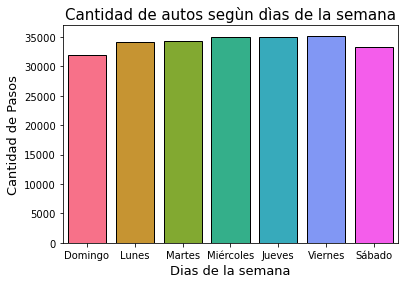

In [70]:
#Visualizamos el flujo de autos durante los dias de la semana
sns.countplot(dataset.dia,saturation=1,linewidth=1,edgecolor=(0,0,0),palette="husl")
plt.xlabel('Dias de la semana', fontsize=13)
plt.ylabel('Cantidad de Pasos', fontsize=13)
plt.title('Cantidad de autos segùn dìas de la semana', fontsize=15)
plt.xticks(fontsize= 10)
plt.yticks(fontsize=10)
plt.show()



A partir del siguiente gràfico podemos observar que todos los dìas de la semana hay un gran volumen de autos que pasan por la estaciòn Illia, siendo sàbados y domingos los dìas con menos flujo.

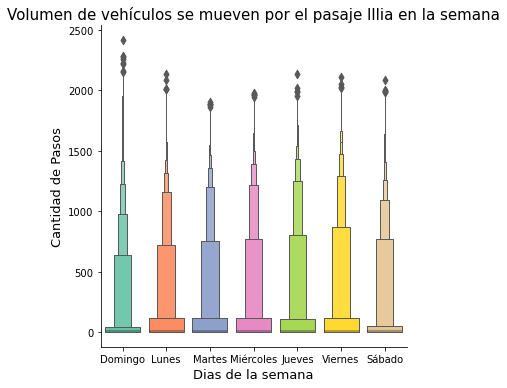

In [69]:
sns.catplot(x="dia",y="cantidad_pasos",data=dataset,palette = "Set2",kind='boxen',saturation=1,linewidth=1)
plt.title( 'Volumen de vehículos se mueven por el pasaje Illia en la semana',fontsize=15)
plt.xlabel('Dias de la semana', fontsize=13)
plt.ylabel('Cantidad de Pasos', fontsize=13)
plt.show()


En este gráfico podemos ver que el mayor volumen se da los dias Viernes, siendo el Domingo el día con el volumen mas bajo. Algo importante que tambien se observa es la presencia de outliers, presentando el dia domingo la mayor cantidad. En un analisis mas profundo podriamos ver que año es el que cuenta con mayor cantidad de outliers.

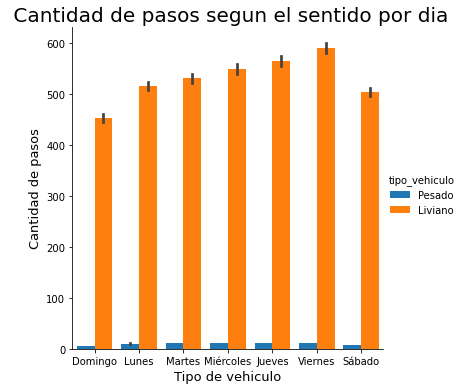

In [26]:
#vizulizacion segun tipo de vehiculo
sns.catplot(x="dia",y="cantidad_pasos",hue="tipo_vehiculo",kind="bar",saturation=1,linewidth=1,data=dataset)
plt.xlabel('Tipo de vehiculo', fontsize=13)
plt.ylabel('Cantidad de pasos', fontsize=13)
plt.title(' Cantidad de pasos segun el sentido por dia', fontsize=20)
plt.show()


Se puede observar que la mayor cantidad de pasos corresponde a vehículos livianos, los dìas viernes. Por lo tanto podemos decir que tipo de vehìculo màs representativo es el LIVIANO.


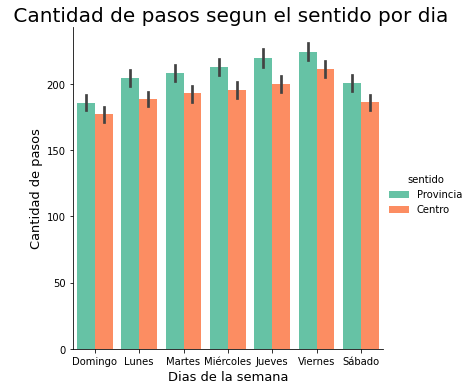

In [31]:
sns.catplot(x="dia",y="cantidad_pasos",hue="sentido",kind="bar",data=dataset, saturation=1,linewidth=1,palette= 'Set2')
plt.xlabel('Dias de la semana', fontsize=13)
plt.ylabel('Cantidad de pasos', fontsize=13)
plt.title(' Cantidad de pasos segun el sentido por dia', fontsize=20)
plt.show()


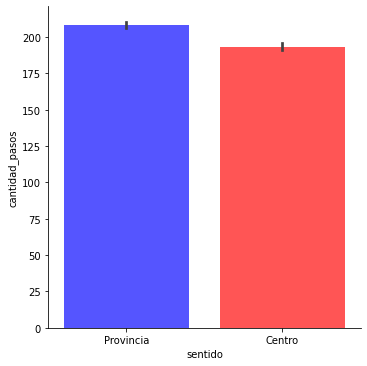

In [32]:
sns.catplot(x="sentido",y="cantidad_pasos",kind="bar",data=dataset, palette='seismic',saturation=1,linewidth=1)

plt.show()

De ambos gráficos se desprende que el sentido provincia es mas abundante que los viajes hacia el centro.

In [72]:
#copy of original data
dt_original=dataset.copy()
dt_original.head()

,periodo,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,2017,Domingo,Provincia,Pesado,1,2017-01-01
1,2017,Domingo,Provincia,Liviano,9,2017-01-01
2,2017,Domingo,Provincia,Liviano,644,2017-01-01
3,2017,Domingo,Provincia,Pesado,6,2017-01-01
4,2017,Domingo,Provincia,Pesado,1,2017-01-01


In [73]:
#creo nuevas features
dt_original['year']=dt_original.fecha.dt.year
dt_original['month']=dt_original.fecha.dt.month_name()
dt_original.head()


,periodo,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,year,month
0,2017,Domingo,Provincia,Pesado,1,2017-01-01,2017,January
1,2017,Domingo,Provincia,Liviano,9,2017-01-01,2017,January
2,2017,Domingo,Provincia,Liviano,644,2017-01-01,2017,January
3,2017,Domingo,Provincia,Pesado,6,2017-01-01,2017,January
4,2017,Domingo,Provincia,Pesado,1,2017-01-01,2017,January


In [74]:
#divido el dataset segun los años
df_2017 = dataset[dataset.periodo == 2017]
df_2018 =dataset[dataset.periodo == 2018]
df_2019 = dataset[dataset.periodo == 2019]

### **Análisis del feature Mes**

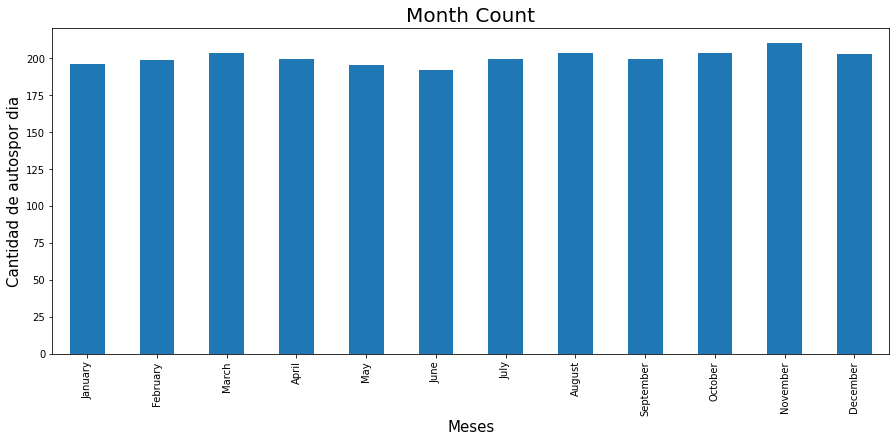

In [34]:
#month count
plt.figure(figsize = (15,6))
dt_original.groupby('month',sort= False) ['cantidad_pasos'].mean().plot.bar()
plt.title ('Month Count', fontsize= 20, c='black')
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Cantidad de autospor dia', fontsize=15)
plt.show()



Vemos que la cantidad de pasos a traves de los meses se mantiene pareja. No apreciamos una baja considerable en ninguno de los meses.


#  **Análisis de la serie según los años**


Vamos a ver la **tendencia linear en cada año**, para esto vamos a ajustar una regresiòn linear a la serie de cada año. Ya que las fechas no se pueden ajustan tal y como estan necesitamos tranformarlas a un formato numerico.

In [77]:
#importamos modelo de regresion linear
from sklearn.linear_model import LinearRegression

#### Serie 2019


In [78]:
#reesampleamos, obtenemos media movil y convertimos a formato numerico.
diario_19 = df_2019.resample('D', on = 'fecha').sum()
diario_19["df_2019"] = diario_19.cantidad_pasos.rolling(12).mean()
diario_19["fecha_numeros"]=diario_19.index.map(datetime.datetime.toordinal)
diario_19.head()


,periodo,cantidad_pasos,df_2019,fecha_numeros
fecha,,,,
2019-01-01,179691,27038,NaN,737060
2019-01-02,193824,47080,NaN,737061
2019-01-03,193824,46194,NaN,737062
2019-01-04,193824,42887,NaN,737063
2019-01-05,191805,25650,NaN,737064


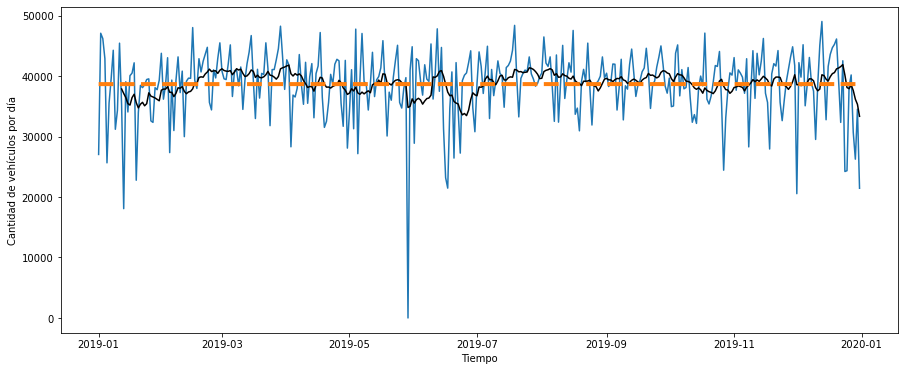

In [80]:
l_r = LinearRegression()
l_r.fit(diario_19.fecha_numeros.values.reshape(-1, 1), diario_19.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(diario_19.index, diario_19.cantidad_pasos)
plt.plot(diario_19.df_2019,c="k",ls="solid",lw=1.5)
plt.plot(diario_19.index, l_r.predict(diario_19.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.xlabel("Tiempo")
plt.ylabel("Cantidad de vehículos por día")
plt.show()

Podemos observar que para este año la serie fue **estacionaria**, presentando para junio un atipico en junio.

#### Serie 2018

In [38]:
#reesampleamos, obtenemos media movil y convertimos a formato numerico.
diario_18 = df_2018.resample('D', on = 'fecha').sum()
diario_18["df_2018"] = diario_18.cantidad_pasos.rolling(12).mean()
diario_18["fecha_numeros"]=diario_18.index.map(datetime.datetime.toordinal)
diario_18.head()

,periodo,cantidad_pasos,df_2018,fecha_numeros
fecha,,,,
2018-01-01,401582,30735,NaN,736695
2018-01-02,567058,47130,NaN,736696
2018-01-03,552932,48162,NaN,736697
2018-01-04,526698,47953,NaN,736698
2018-01-05,552932,49505,NaN,736699


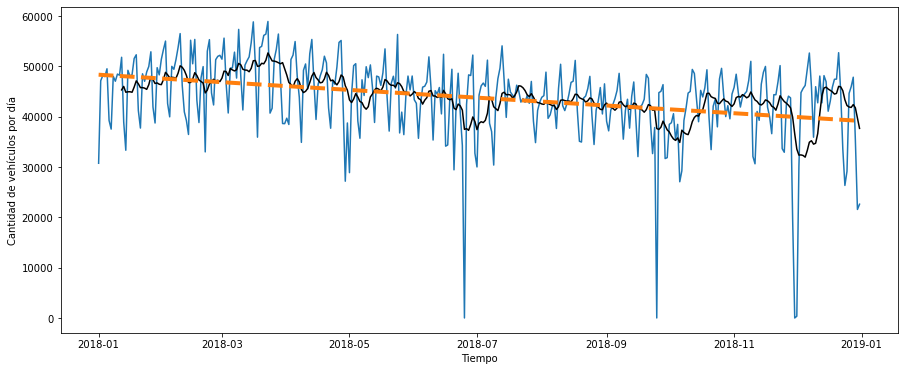

In [39]:
l_r = LinearRegression()
l_r.fit(diario_18.fecha_numeros.values.reshape(-1, 1), diario_18.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(diario_18.index, diario_18.cantidad_pasos)
plt.plot(diario_18.df_2018,c="k",ls="solid",lw=1.5)
plt.plot(diario_18.index, l_r.predict(diario_18.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.xlabel("Tiempo")
plt.ylabel("Cantidad de vehículos por día")
plt.show()

El gráfico anterior muestra uns tendencia en caída, con respecto a los atipicos observammos tres picos para julio, octubre y diciembre.

### **Serie 2017**

In [82]:
#reesampleamos, obtenemos media movil y convertimos a formato numerico.
diario_17 = df_2017.resample('D', on = 'fecha').sum()
diario_17["df_2017"] = diario_17.cantidad_pasos.rolling(12).mean()
diario_17["fecha_numeros"]=diario_17.index.map(datetime.datetime.toordinal)
diario_17.head()

,periodo,cantidad_pasos,df_2017,fecha_numeros
fecha,,,,
2017-01-01,465927,31183,NaN,736330
2017-01-02,637372,51568,NaN,736331
2017-01-03,619219,51093,NaN,736332
2017-01-04,647457,53332,NaN,736333
2017-01-05,641406,56486,NaN,736334


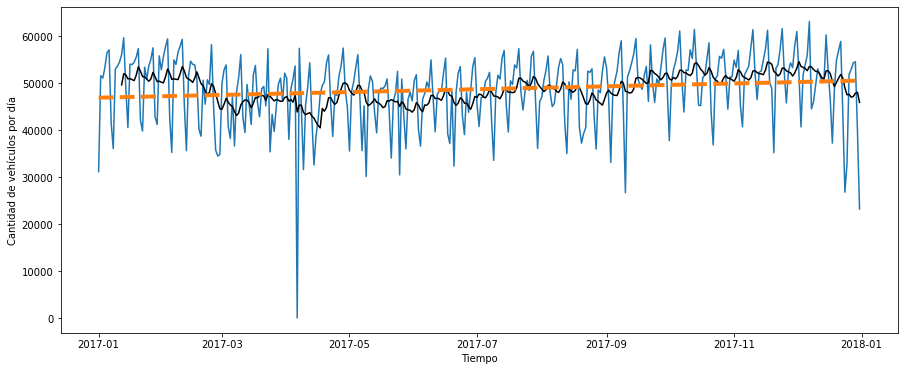

In [83]:
l_r = LinearRegression()
l_r.fit(diario_17.fecha_numeros.values.reshape(-1, 1), diario_17.cantidad_pasos)

plt.figure(figsize = (15,6))
plt.plot(diario_17.index, diario_17.cantidad_pasos)
plt.plot(diario_17.df_2017,c="k",ls="solid",lw=1.5)
plt.plot(diario_17.index, l_r.predict(diario_17.fecha_numeros.values.reshape(-1, 1)), lw = 4,ls = "--")

plt.xlabel("Tiempo")
plt.ylabel("Cantidad de vehículos por día")
plt.show()


Para el año 2017 la tendencia sube y encontramos un outliers para el mesde Abril.

# **Análisis de la serie completa**
En este apartado vamos a relizar un análisis de la serie completa, de sus componentes y residuos.

### **Componentes de la Serie**

**Media Móvil** : Consiste en definir una ventana de tiempo (rolling window) y promediar la serie sobre esa ventana. De esta manera la misma queda suavizada y nos permite ver la tendencia.


In [42]:
promedio_tendencia = diario.cantidad_pasos.rolling(window= 30, center = True).mean()

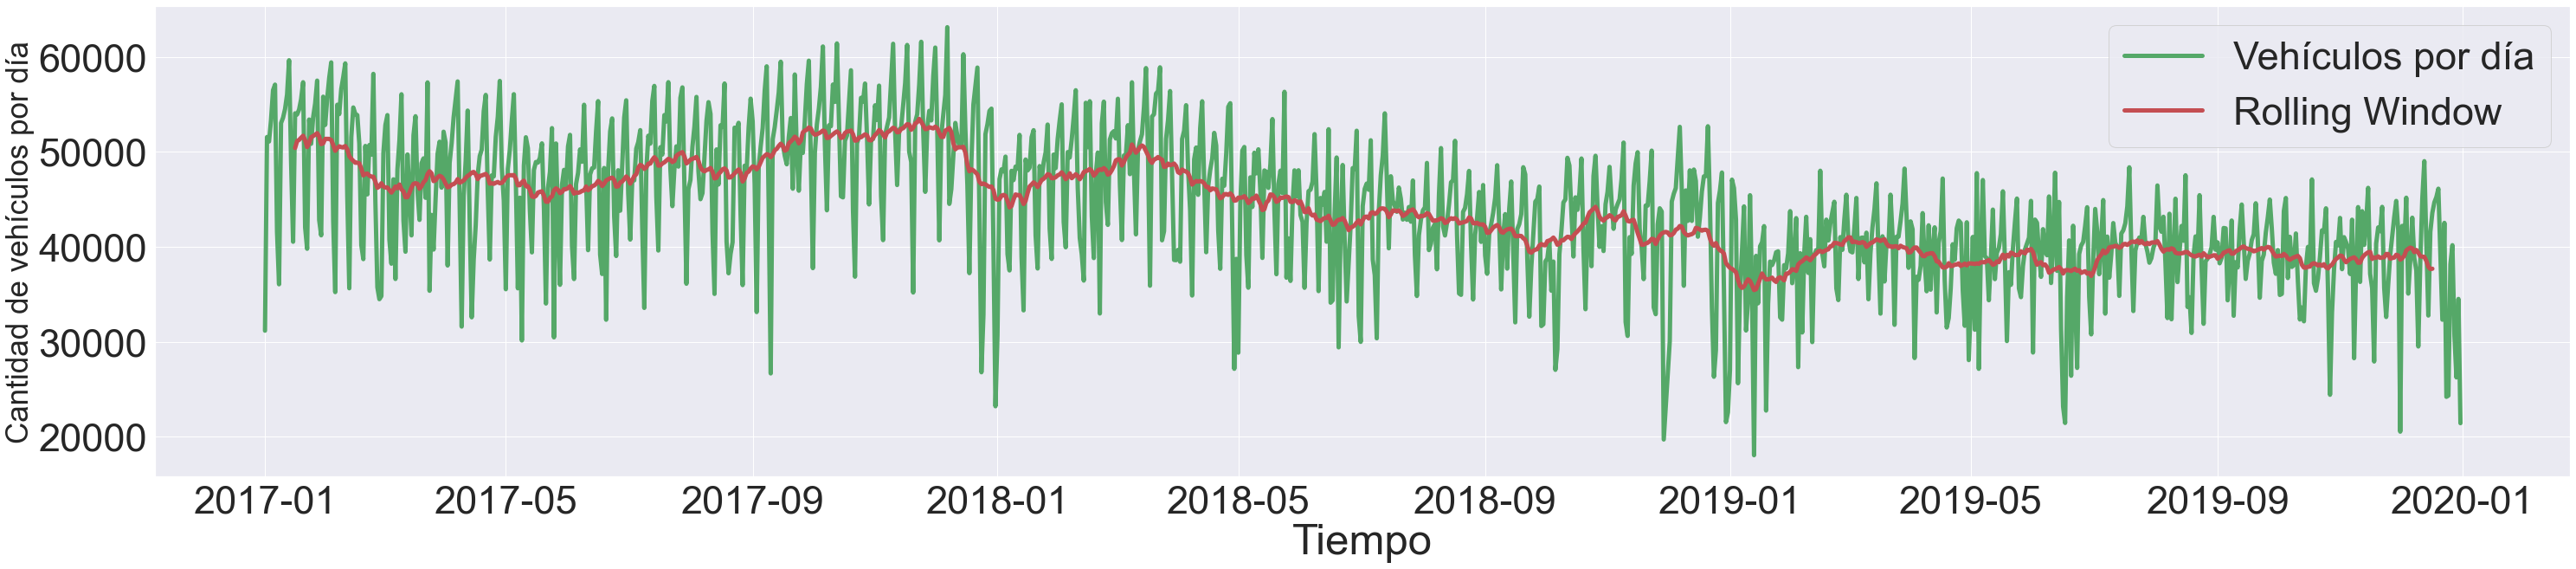

In [43]:
plt.figure(figsize=(50,10));
sns.set(font_scale=4.1)
sns.lineplot(x=diario.index, y=diario.cantidad_pasos, lw = 5,label = 'Vehículos por día',color = 'g')
plt.plot(promedio_tendencia, lw = 5, label = 'Rolling Window',color = 'r')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por día',fontsize = 35)
plt.legend()
plt.show()

Se puede observar una tendencia negativa en la cantidad de vehículos que circulan por este peaje abonando en efectivo con el pasar de los años.

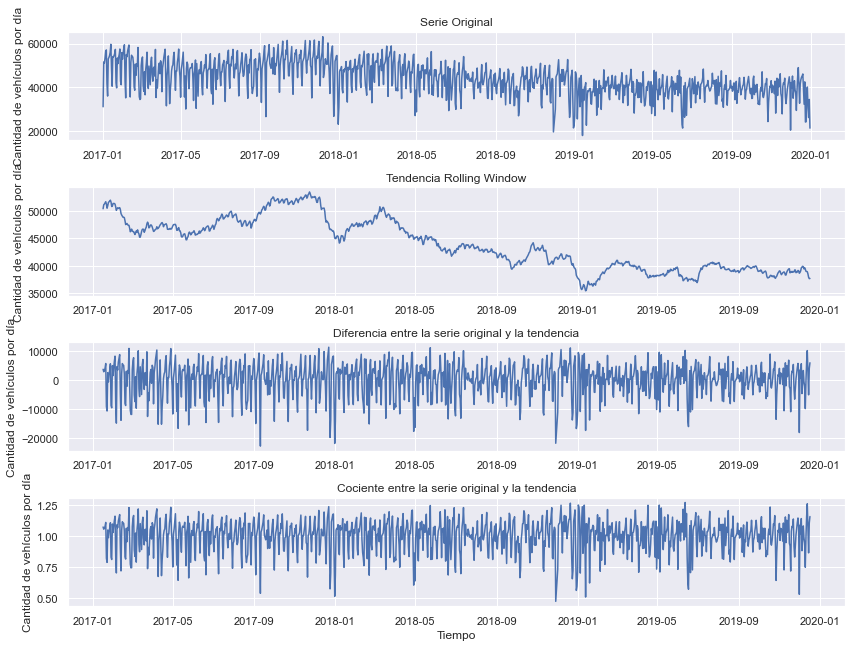

In [44]:
plt.figure(figsize = (12,9))
sns.set(font_scale=1)
plt.subplot(4,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de vehículos por día')

plt.subplot(4,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(promedio_tendencia)
plt.ylabel('Cantidad de vehículos por día')

plt.subplot(4,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - promedio_tendencia)
plt.ylabel('Cantidad de vehículos por día')

plt.subplot(4,1,4)
plt.title('Cociente entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos / promedio_tendencia)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por día')

plt.tight_layout()
plt.show()

Observando estos graficos se puede decir que la tendencia es en baja hacia el 2019 .

### **Prueba de hipotesis Dickey-Fuller**: Analisis de Estacionariedad.
Una serie es estacionaria cuando es estable a lo largo del tiempo, es decir, cuando la media y la varianza son constantes en el tiempo y ademas no presentan tendencia
A partir de este test vamos a saber si nuestra serie es estacionaria o no.
H0: la serie es no estacionaria
H1: la serie es estacionaria 
El p-valor se puede interpretar como el valor que representa cuán probable es la hipótesis nula. Si es un valor muy cercano a cero significa que esa hipótesis es poco probable y habría que rechazarla.¿Cómo sabemos si es un valor muy bajo, pero suficiente para rechazar la Hipótesis nula? Porque siempre que hagamos algo en inferencia vamos a tener un nivel de confianza, por ejemplo, el 95%, y lo que le falta a eso para llegar al 100% es nuestro nivel de significación, es decir 0.05. Entonces compararíamos el p-valor con el nivel de significación. Si es más pequeño diremos que es suficientemente bajo para rechazar la Hipótesis nula.

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
result = adfuller(diario["cantidad_pasos"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.752326
p-value: 0.404374
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Si el valor P>0.5, se acepta la hipotesis nula; si el valor P<0.5, se rechaza la hipotesis nula y se acepta la hipotesis alternativa. En nuestro test el valor de P es 0.40, por lo tanto se acepta la hipotesis nula y nuestra serie NO es estacionaria.

### **Autocorrelación**

La autocorrelación mide el nivel de semejanza entre una secuencia de hace varios períodos y los datos reales.
En series temporales es vital poder calcular y comparar los valores de autocorrelación entre diferentes retrasos. Para ello, necesitamos introducir la función de autocorrelación o ACF (autocorrelation function). 

In [47]:
import statsmodels.graphics.tsaplots as sts

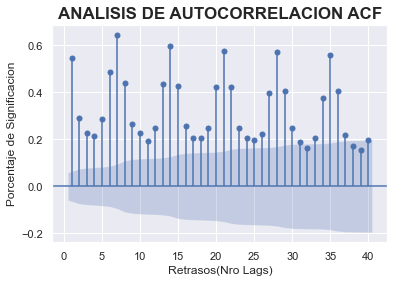

In [48]:
sts.plot_acf(diario["cantidad_pasos"],zero=False,lags=40)
plt.title("ANALISIS DE AUTOCORRELACION ACF",size=17,fontweight="bold")
plt.xlabel("Retrasos(Nro Lags)")
plt.ylabel("Porcentaje de Significacion")
plt.show()

El eje **y** nos presenta el nivel de autocorrelación entre dos perìodos diferentes de la serie. El eje horizontal representa los lags  con los cuales estamos trabajando. Podemos analizar que existe un patron estacional cada 7 dias.  A medida que  aumenta los retrazos disminuye la autocorrelación, esto es porque cuanto mayor distancia en el tiempo es más improbable  es que dos eventos de la serie de tiempo esten correlacionados. El àrea sombreada en azul representa la significación de los valores de autocorrelación, es decir, mide si son significativamente distintos de cero lo que sugiere la existencia de autocorrelación para ese retraso especifico, esta area se expande a medida que se aumenta los retrasos. Cuando esta región se traslapa con las líneas verticales quiere decir que no hay argumentos para garantizar la autocorrelación entre los eventos, es decir, según el gráfico  solo se pueden hacer prediciones máximo con un mes de retraso.

En conclusión, nuestros datos son altamente dependientes de la fecha en que se midan, pues la autocorrelación varia significativamente dependiento del retraso.

### **Autocorrelación Parcial**
Una autocorrelación parcial es un resumen de la relación entre una observación en una serie temporal con observaciones en etapas anteriores, sin tener en cuenta las relaciones de las observaciones intermedias.

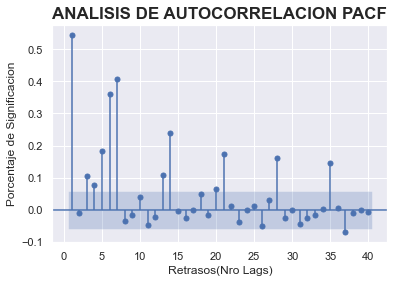

In [49]:
sts.plot_pacf(diario["cantidad_pasos"],zero=False,lags=40,)
plt.title("ANALISIS DE AUTOCORRELACION PACF",size=17,fontweight="bold")
plt.xlabel("Retrasos(Nro Lags)")
plt.ylabel("Porcentaje de Significacion")
plt.show()

Podemos observar como el primer coeficiente es altamente significativo y va disminuyendo atraves del tiempo, lo que nos indica que a pesar de la alta significacion de ese coeficiente a mayor numero de retrasos va perdiendo significacion para la serie temporal.

### PARTE C: Modelo de Machine Learning - Predicción a Futuro

### **Benchmark-- Regresiòn Lineal**
Como modelo base para comparar vamos a utilizar una Regresiòn Linear.
La metrica de Evaluacion elegida es RMSE y R2.

In [180]:
df = diario["cantidad_pasos"]
df.shape
df

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    21447.0
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

In [51]:
# En primer lugar, debemos definir cuántos valores hacia atrás tomaremos.
look_back = 30 # Dias atras para predecir el dia siguiente
N=df.shape[0]
N

1095

In [52]:
#Definimos x e y
N = df.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1064, 30) (1064,)


In [53]:
for i in range(X.shape[0]):
    X[i,:] = df.iloc[i:i+look_back]
    y[i] = df.iloc[i+look_back]

In [54]:
N_train =int(len(df)*0.8)-look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = int(len(df)*0.2) #cantidad de puntos que vamos a usar para evaluar
N_total= N_train+ N_test
length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(846, 30) (846,)
(218, 30) (218,)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
#definimos el modelo
benchmark= LinearRegression()

In [57]:
#entrenamos
benchmark.fit(X_train,y_train)

LinearRegression()

In [58]:
#predecimos
y_train_pred_bench = benchmark.predict(X_train)
y_test_pred_bench = benchmark.predict(X_test)


C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 4861.65
RMSE TEST: 4894.9


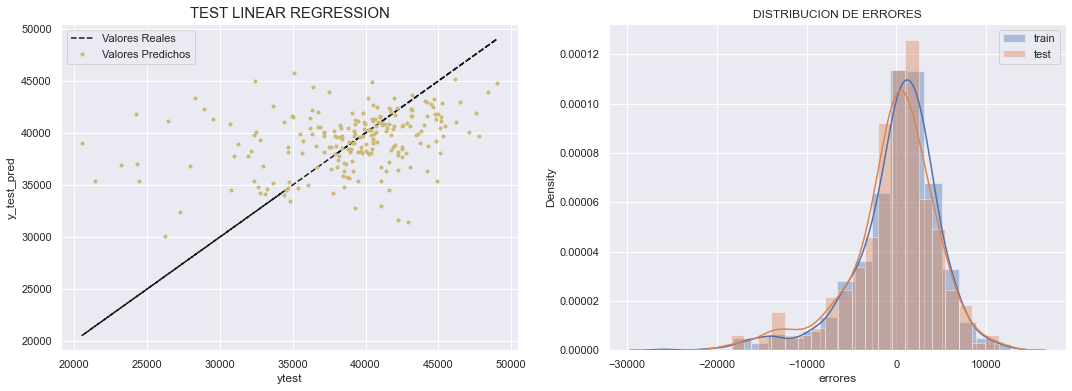

In [92]:
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico 
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred_bench, "y.", label="Valores Predichos")
plt.title("TEST LINEAR REGRESSION", fontsize=15)
plt.xlabel("ytest")
plt.ylabel("y_test_pred")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred_bench, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_bench, bins = 20, label = 'test')
plt.xlabel('errores')
plt.title("DISTRIBUCION DE ERRORES")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred_bench),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred_bench)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred_bench),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred_bench)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred_bench)),2)


print( "RMSE Train:",rmse_train)
print("RMSE TEST:", rmse_test)



### **Random Forest**

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
# Creamos el modelo Random Forest 
rfr= RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)

# Entrenamos el modelo 
rfr.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [106]:
# predecimos los valores 
y_pred = rfr.predict(X)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

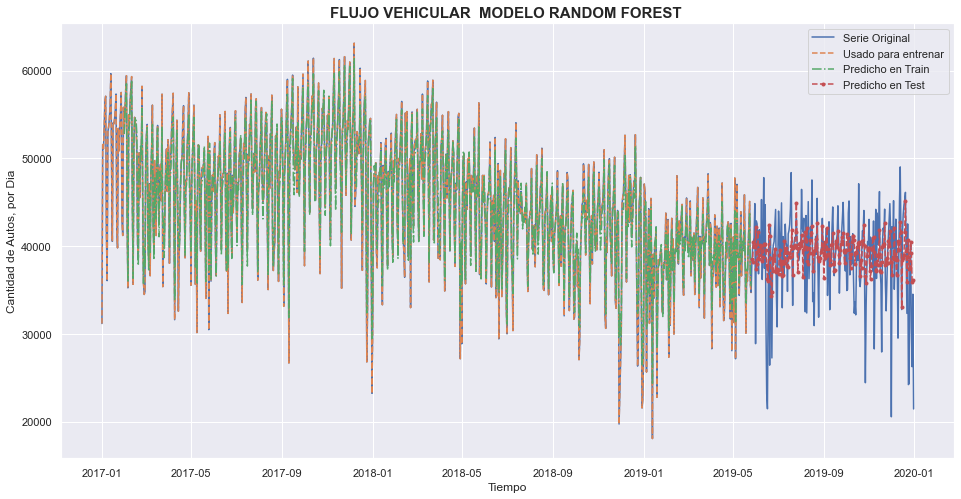

In [107]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total], label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR  MODELO RANDOM FOREST ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

En la gráfica anterior podemos ver la porcion de datos utilizada para entrenamiento y la utilizada para testeo con sus respectivas predicciones. La prediccion de test por lo que vemos no es buena ya que arroja una cantidad de autos  menor valor del que verdaderamente tiene, por lo tanto esta subestimando los datos.

In [108]:

## Calculamos el Error

MSE_Train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_Train))

MSE_Test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_Test))

Error en Train: 1864.2548816542392
Error en Test: 4689.530485540004


C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 1864.25
RMSE Test: 4689.53


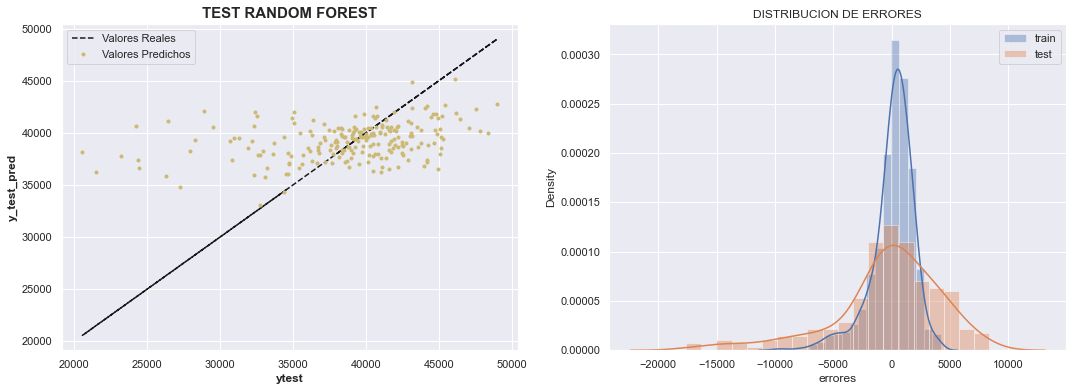

In [109]:
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico donde podemos observar la relacion 1 a 1
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST RANDOM FOREST", fontsize=15, fontweight="bold")
plt.xlabel("ytest", fontweight="bold")
plt.ylabel("y_test_pred", fontweight="bold")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.title("DISTRIBUCION DE ERRORES")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE Test:", rmse_test)

Observamos la comparacion entre los valores reales y los valores predichos, los cuales se ven muy diferente y en la distribucion de los errores en el test se disparcen entre valores mayores o menores a 0.
Por lo tanto podemos decir que  el modelo de Random Forest es muy pobre en predición con sus parametros por defecto. Los resultados pueden mejorarse con el aumento del tamaño de la muestra o optimizando el modelo.

### **Random Forest Optimizado**

Ahora haremos un optimizacion de los hiperparametros buescando mejorar las metricas del modelo anterior sin optimizar.

In [110]:
# utilizamos un GridSearch para optimizar el modelo

from sklearn.model_selection import GridSearchCV

In [111]:
params= {"max_depth":[10,20,30,50,100,200],
        "n_estimators":[100,200,500],
        "min_samples_split":[2,4,6,8]}

In [112]:
rfr_gs=GridSearchCV(rfr,param_grid=params,n_jobs=-1,verbose=1)

In [113]:
rfr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  9.8min finished


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50, 100, 200],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [114]:
rfr_gs.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=8, n_estimators=500,
                      n_jobs=-1, random_state=42)

In [115]:
y_pred = rfr_gs.predict(X)
y_train_pred = rfr_gs.predict(X_train)
y_test_pred = rfr_gs.predict(X_test)

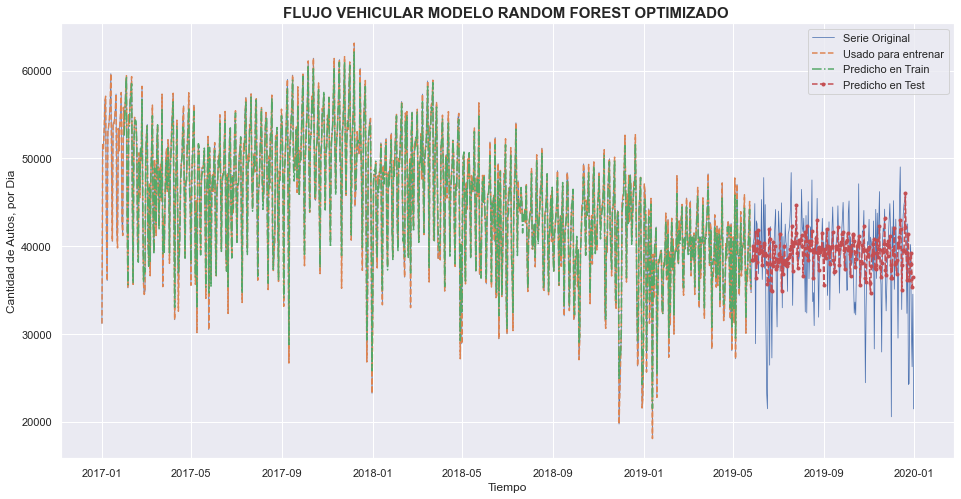

In [123]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR MODELO RANDOM FOREST OPTIMIZADO ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

A simple vista podemos ver que la predicción en Test no mejoro considerablemnte. Pero aálizaremos las métricas del error.

In [117]:
MSE_Train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_Train))

MSE_Test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_Test))

Error en Train: 2279.350623527212
Error en Test: 4652.883354412805


Vemos que el error en los datos de entrenamiento dan mayor (2279) comparandolo con el modelo de random forest con los valores predeterminados (1864), sin embargo el error en test disminuye pero no de una manera significativa. Concluimos es que este modelo no nos ayudara a predecir de una forma confiable los valores a futuro.

C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 2279.35
RMSE Test: 4652.88


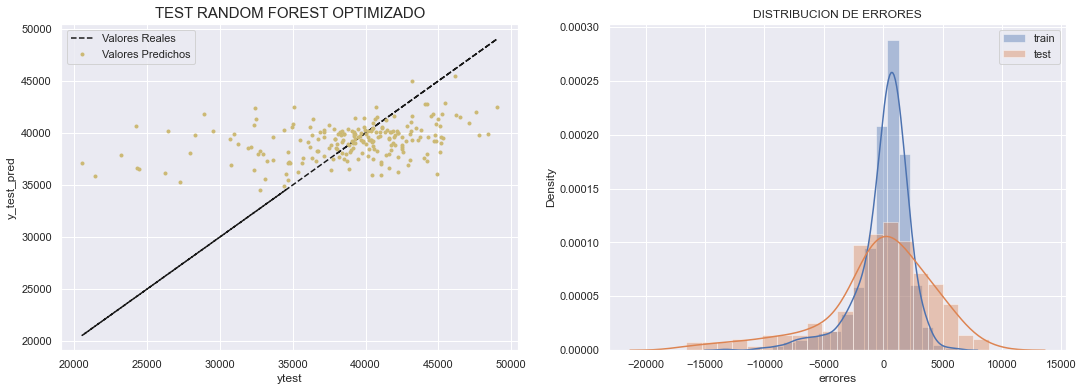

In [118]:
# graficamos el modelo 
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST RANDOM FOREST OPTIMIZADO", fontsize=15)
plt.xlabel("ytest")
plt.ylabel("y_test_pred")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.title("DISTRIBUCION DE ERRORES")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE Test:", rmse_test)

### **MODELO XGBOOST**

Comenzamos utilizando el modelo con los parametros por defecto.

In [98]:
from xgboost import XGBRFRegressor

In [99]:
#creamos el modelo
xgb_model= XGBRFRegressor()

In [100]:
#entrenamos modelo
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [101]:
#predecimos
y_pred = xgb_model.predict(X)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

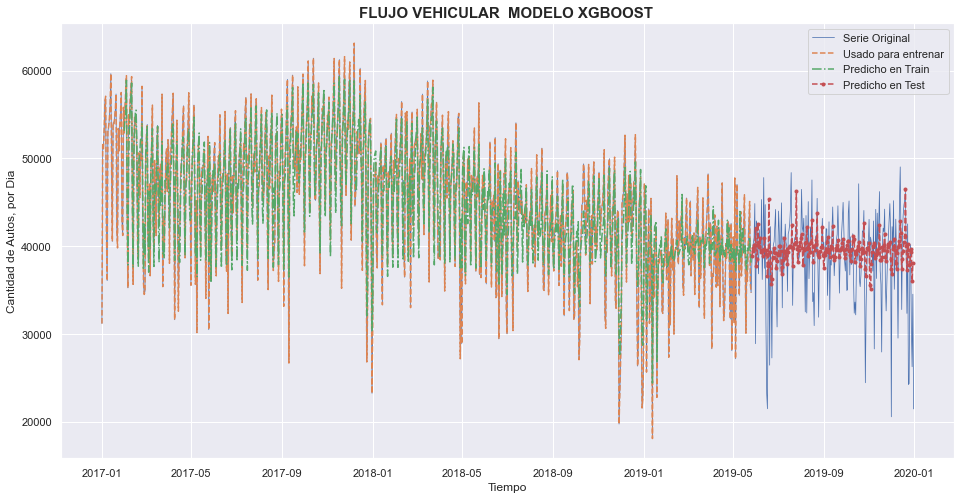

In [102]:
#graficamos
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR  MODELO XGBOOST ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

La predicciòn en los datos de entrenamiento no mejorò considerablemente.

C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 3197.04
RMSE: 4702.86


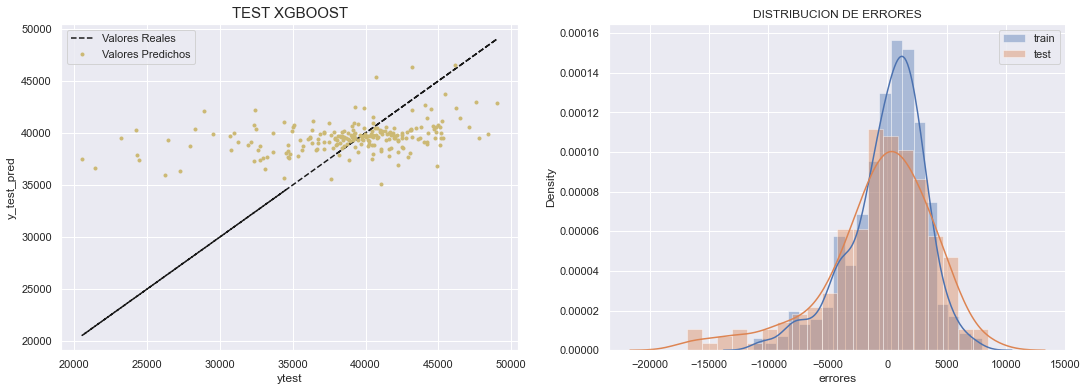

In [103]:
# graficamos el modelo
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)


plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST XGBOOST", fontsize=15)
plt.xlabel("ytest")
plt.ylabel("y_test_pred")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.title("DISTRIBUCION DE ERRORES")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE:", rmse_test)

### **MODELO XGBOOST OPTIMIZADO**

In [89]:
params= {"n_estimators":[100,200,500],
        "gamma":[0,0.1,0.01,0.001],
        "max_depth":[10,30,50,100]}

In [90]:
xgb_gs= GridSearchCV(xgb_model,param_grid=params,n_jobs=-1,verbose=1)

In [91]:
xgb_gs.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.9min finished


GridSearchCV(estimator=XGBRFRegressor(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bytree=1,
                                      gamma=0, gpu_id=-1,
                                      importance_type='gain',
                                      interaction_constraints='',
                                      max_delta_step=0, max_depth=6,
                                      min_child_weight=1, missing=nan,
                                      monotone_constraints='()',
                                      n_estimators=100, n_jobs=4,
                                      num_parallel_tree=100,
                                      objective='reg:squarederror',
                                      random_state=0, reg_alpha=0,
                                      scale_pos_weight=1, tree_method='exact',
                                      validate_parameters=1, verbosity=None),
             n_jobs=-1,
             pa

In [119]:
xgb_gs.best_params_

{'gamma': 0, 'max_depth': 30, 'n_estimators': 500}

In [120]:
y_pred = xgb_gs.predict(X)
y_train_pred = xgb_gs.predict(X_train)
y_test_pred = xgb_gs.predict(X_test)

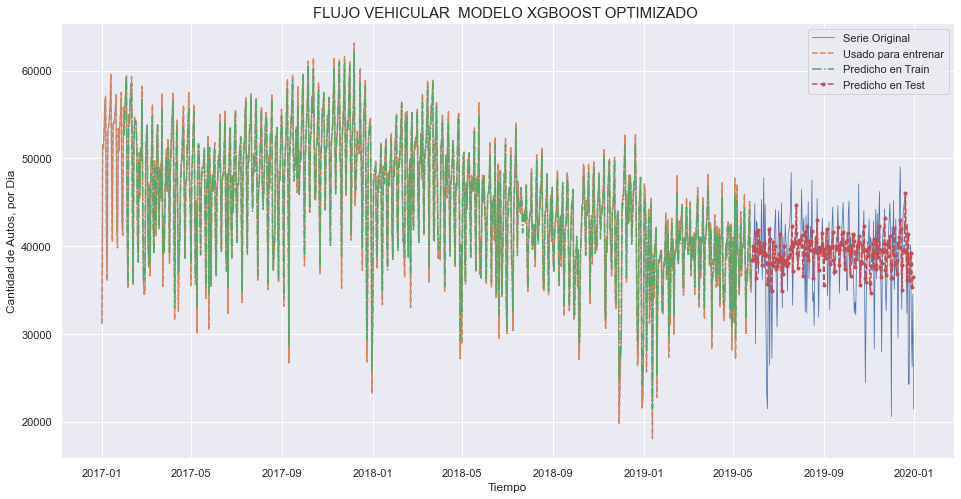

In [121]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR  MODELO XGBOOST OPTIMIZADO ",size=15)
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabiana\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


RMSE Train: 1003.62
RMSE Test: 4646.57


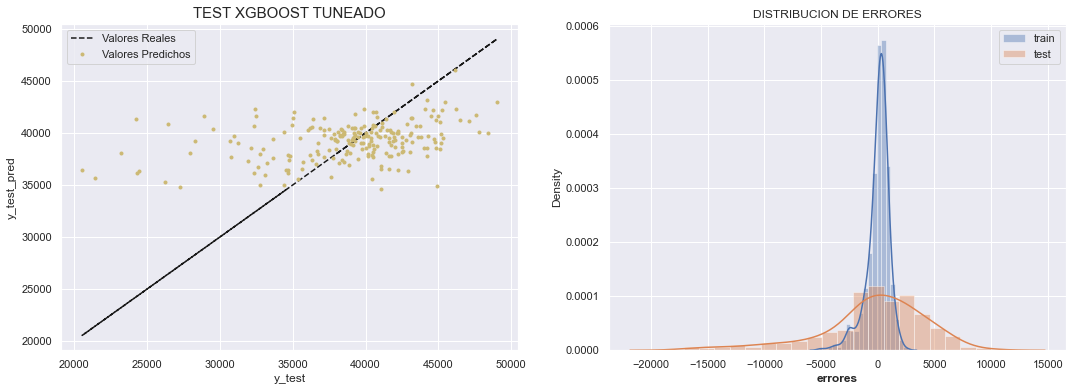

In [122]:
# graficamos el modelo 
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)


plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST XGBOOST OPTIMIZADO")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.title("DISTRIBUCION DE ERRORES")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE Test:", rmse_test)

### **Comparacion de Modelos**

In [124]:
error_modelos = pd.DataFrame({
                        'modelo': ['Benchmark', 'RandomForest', 'RandomForest-Optimizado',
                                   'Xgboost','Xgboost Optimizado'],
                        'rmse_test': [4894.9,4689.53, 4652.88,4702.80,4646.57],
                        'rmse_train': [4861.65,1864.25,2279.35,3197.04,1003.62]
                     })

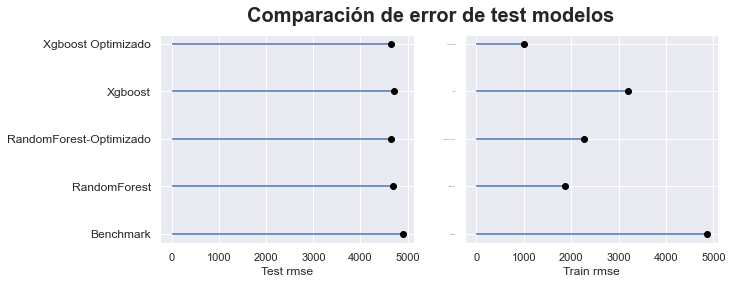

In [125]:
fig = plt.figure(figsize=(10, 3.84)) 
ax1 = plt.subplot(1,2,1) 
ax1.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse_test, color ='b')
ax1.plot(error_modelos.rmse_test, error_modelos.modelo, "o", color='black')
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.set_xlabel('Test rmse');

ax2 = plt.subplot(1,2,2)
ax2.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse_train,color='b')
ax2.plot(error_modelos.rmse_train, error_modelos.modelo, "o", color='black')
ax2.tick_params(axis='y', which='major', labelsize=0)
ax2.set_xlabel('Train rmse');
fig.suptitle('Comparación de error de test modelos', fontsize = 20, fontweight = "bold");

Entre los modelos entrenados, vemos que el que posee mejor performance, es decir, menor RMSE en el conjunto de train y test es Xgboost Optimizado, por lo cual es este modelo el cual usaremos para predecir el futuro. Se aclara que no se tiene el mejor performance en los modelos debido que la serie es no estacionaria. En el proximo proyecto atacaremos el problema sobre este item y así mejoraremos las prediciones.

# **PREDICCION 2020**

In [137]:
#Cargamos la data
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [164]:
data_2020.info()
data_2020.forma_pago.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


Tag                  1429726
Violación             424291
Efectivo              264083
Rec.Deuda             187388
Exento                149718
Tarjeta Magnética      50495
CPP                    17379
Mercado Pago           10663
Name: forma_pago, dtype: int64

In [165]:
d = data_2020 [(data_2020 .estacion == 'ILLIA') & (data_2020 .forma_pago == 'Efectivo')]
d.fecha =  pd.to_datetime(d.fecha,dayfirst = True) + pd.to_timedelta(d.hora_fin, unit = 'h')
d.sort_values('fecha', inplace = True)
d.reset_index(drop=True, inplace = True)
df =d[['fecha','cantidad_pasos']]
df = df.resample('d', on = 'fecha').sum()

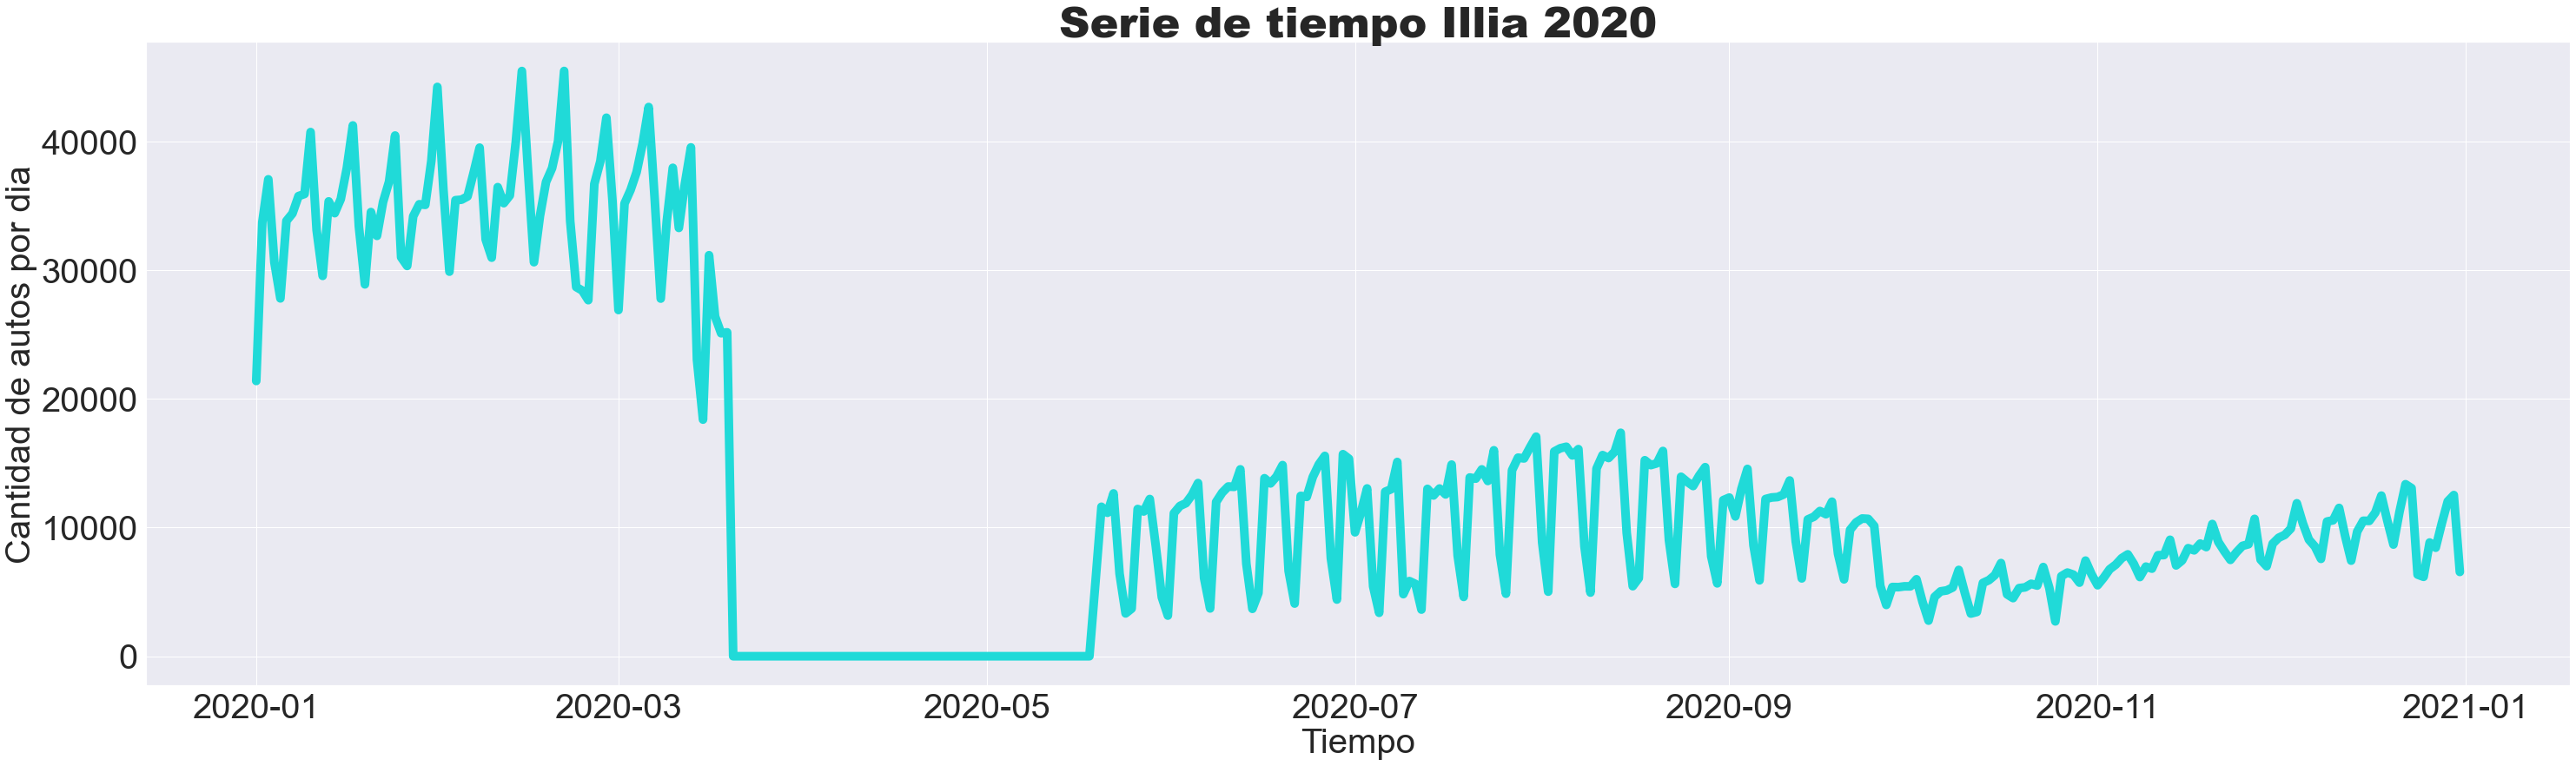

In [216]:
plt.figure(figsize=(50,30));
ax1 = plt.subplot(211);
ax1 = sns.lineplot( x=df.index, y=df.cantidad_pasos, color = c5,lw = 10 );
#ax1.legend(fontsize=30,shadow=True);
ax1.grid(True);
plt.setp(ax1.get_yticklabels(), visible=True,fontsize = 40);
plt.setp(ax1.get_xticklabels(), visible=True,fontsize = 40);
plt.xlabel('Tiempo',fontsize = 40)
plt.ylabel('Cantidad de autos por dia',fontsize = 40);
plt.title ('Serie de tiempo Illia 2020', fontweight = 'black');

En el grafico anterior a partir de marzo se pueden ver claramente los efectos de la pandemia, la cual afecto directamente el transito de autos en la Ciudad de Buenos Aires. Tambien vemos un rupente en junio cuando comenzaron a retomarse algunas actividades aunque sin alcanzar los niveles de trafico por la estacion Illia en enero/ febrero de 2020.

In [181]:
# Generamos una serie con datos vacíos para todo el año 2020
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 31)
index = pd.date_range(start, end)

s2020=pd.Series(np.zeros(366))
s2020.index=index
# Agregamos estos datos a nuestra serie original que tenía los datos de los años 2017,2018 y 2019.
serie2020=df.append(s2020)
serie2020

2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2020-12-27        0.0
2020-12-28        0.0
2020-12-29        0.0
2020-12-30        0.0
2020-12-31        0.0
Freq: D, Length: 1461, dtype: float64

In [193]:
look_back2020=360 #Vamos a usar un año de datos anteriores para predecir
N2020=serie2020.shape[0] #El total de N que tendremos será la serie que acabamos de crear.
N2020

1461

In [194]:
# Definimos X e Y
X2020 = np.zeros((N2020 - look_back2020 - 1,look_back2020)) # Lo que estamos haciendo es crear una fila en X con 365 valores para cada fila en Y que vamos a predecir
y2020 = np.zeros(N2020 - look_back2020 - 1)
print(X2020.shape, y2020.shape)

(1100, 360) (1100,)


In [195]:
# LLenamos los X e y
for i in range(X2020.shape[0]): #X.shape[0] es la cantidad de valores a pronosticar que es igual a y.shape[0], es decir, 1094.
    X2020[i,:] = serie2020.iloc[i:i+look_back2020]
    y2020[i] = serie2020.iloc[i+look_back2020]

In [203]:
N_train2020=len(diario)-look_back2020 #Para entrenar vamos a utilizar los 3 años completos de datos
N_test2020 = len(s2020)
N_total2020 = N_train2020 + N_test2020
length_total2020 = N_train2020 + N_test2020 + look_back2020
length_total2020

1461

In [204]:
# Hacemos el train/test split.
X_train2020 = X2020[:N_train2020,:]
y_train2020 = y2020[:N_train2020]
print(X_train2020.shape, y_train2020.shape)

X_test2020 = X2020[N_train2020:N_train2020+N_test2020,:]
y_test2020 = y2020[N_train2020:N_train2020+N_test2020]
print(X_test2020.shape, y_test2020.shape)

(735, 360) (735,)
(365, 360) (365,)


In [205]:
rf_2020= RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs = 1)
rf_2020.fit(X_train2020,y_train2020)
y_train_pred2020=rf_2020.predict(X_train2020)
y_test_pred2020 = []
x2020 = X_test2020[0,:] # arrancamos con la primera instancias del conjunto de test

In [206]:
for i in range(y_test2020.size):
    y_os_pred2020 = rf_2020.predict(x2020.reshape(1,-1))
    y_test_pred2020.append(y_os_pred2020)
    x2020 = np.append(x2020[1:], y_os_pred2020)
y_test_pred2020 = np.array(y_test_pred2020)


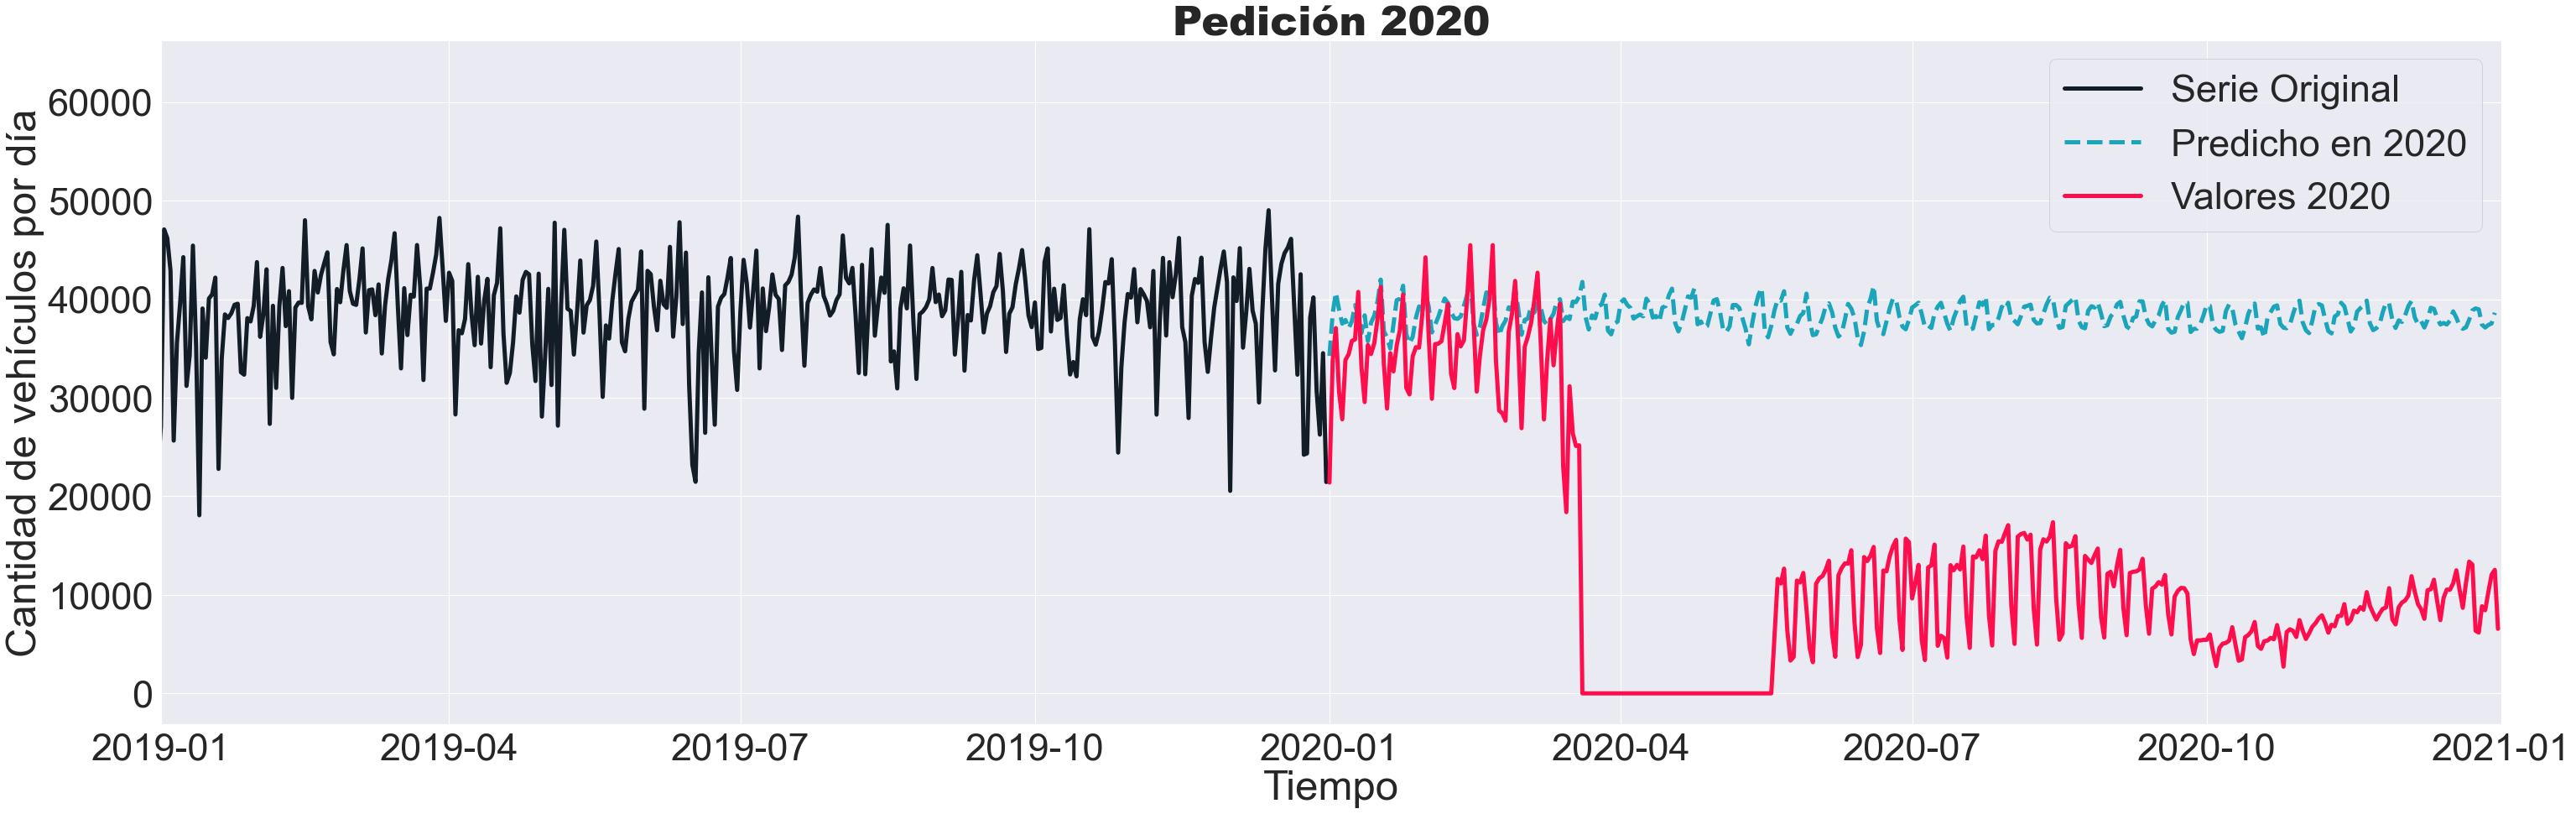

In [207]:
plt.figure(figsize=(50,15));
sns.set(font_scale=4.1)
sns.lineplot(x = serie2020.index[:length_total],y= serie2020[:length_total],lw = 5, label = 'Serie Original', color = c1)
plt.plot(serie2020.index[N_train2020+look_back2020: length_total2020-1], y_test_pred2020,'--', lw = 5, label = 'Predicho en 2020', color=c4)
sns.lineplot(x=df.index, y=df.cantidad_pasos,lw = 5, label = 'Valores 2020', color = c8)
plt.xlim('2019','2021')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por día')
plt.title ('Pedición 2020', fontweight = 'black')
plt.show()

En este grafico vemos la prediccion del 2020 realizda tomando los atos de 2019, en rosa observamos los valores reales del 2020. Esta fue una situacion muy atipica por la pandemia. En relacion a esto y por lo excepcional de la situacionel 2020 deberia considerarseun OUTLIER.

In [209]:
rmse2020 = np.sqrt(mean_squared_error(y_test_pred2020, df.cantidad_pasos[1:]))
r2_2020 = r2_score(y_test_pred2020, df.cantidad_pasos[1:])
print('---------------------------------------------------------------------------------------------------------------------')
print(f'                             Raíz del error cuadrático medio en Test: {rmse2020:0.3f}')
print('---------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------
                             Raíz del error cuadrático medio en Test: 27835.245
---------------------------------------------------------------------------------------------------------------------


### Conclusiones


**Predicciones:** 
No podemos saber con certeza si hubiese ocurrido lo que predijo el modelo para el 2020 ya que el año fue muy atipico para poder predecir si se va a comportar de la forma que lo hizo en el modelo. 
Tambien hay que tener en cuenta que la tendencia viene en baja desde el 2017 por lo que puede haber factores externos que esten afectando a la circulacion vehicular en este pasaje y en esta forma de pago.
Por otro lado la performance de los modelos no es la mejor ya que la serie de tiempo NO es estacionaria, por esto en el Proyecto 4 vamos a tranformarla en estacionaria. Y vamos a aplicar modelos estadicticos clásicos (ARIMA, SARIMA y/o SARIMAX) y avanzados como Prophet o LSTM, y ver si mejoran las predicciones para pronosticar los valores de cantidad de autos que pasarán cada día por cada una de las estaciones de peaje.

### PARTE C: Investigación.
Para obtener mejores resultados con el proyecto sería interesante podriamos:
1. Incluir las variables categóricas  (sentido de circulación y tipo de vehículo) con el objetivo de proporcionarle una mayor cantidad de atributos que puedan explicar el comportamiento de la serie de tiempo.Esto podriamos lograrlo  por la transformación de las variables categóricas en dummies y luego calcular la proporción de cada uno de ellos.
2. Otra alternativa interesante, consiste en evaluar otros modelos VOLVIENDO la serie estacional y ver si mejoran los resultados predictivos. 
